In [26]:
# SSL FIX
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import urllib.request
from bs4 import BeautifulSoup

# INSERT CODE FOR STEPS 3-4
url = 'https://en.wikipedia.org/wiki/List_of_stars_in_Aquila'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')

In [27]:
table = soup.find_all('table', class_='wikitable sortable')[0]

In [28]:
name = []
bayer_designation = []
right_ascension = []
declination = []
vis_magnitude = []
for row in table.find_all('tr'):
  cells = row.find_all('td')
  if (len(cells) == 14):
    name.append(cells[0].text.strip())
    bayer_designation.append(cells[1].text.strip())
    right_ascension.append(cells[7].text.strip())
    declination.append(cells[8].text.strip())
    vis_magnitude.append(cells[9].text.strip())


In [29]:
import pandas as pd

#df = pd.DataFrame({'Name': name})
#df['Bayer Designation'] = bayer_designation
#df['Right Ascension'] = right_ascension
#df['Declination'] = declination
#df['Visual Magnitude'] = vis_magnitude

#df.to_csv('CSC221-webscrape-data.csv')

df = pd.read_csv('CSC221-webscrape-data.csv')
df

,Unnamed: 0,Name,B,F,G,Var,HD,HIP,RA,Dec,vis_mag,Dist.,Sp.class,Notes
0,0,Altair,α,53,86.0,NaN,187642.0,97649.0,19h 50m 46.68s,+08° 52′ 02.6″,0.76,17,A7IV-V,"Atair, Al Nesr Al Tair, Vulture Volans;[1] 12t..."
1,1,γ Aql,γ,50,NaN,NaN,186791.0,97278.0,19h 46m 15.57s,+10° 36′ 47.8″,2.72,460,K3II,"Tarazed, Tarazad, Reda, Menkib al Nesr, Humeru..."
2,2,ζ Aql,ζ,17,NaN,NaN,177724.0,93747.0,19h 05m 24.61s,+13° 51′ 49.4″,2.99,83,A0Vn,"Okab, Deneb el Okab, Denebokab Australis, Woo,..."
3,3,θ Aql,θ,65,117.0,NaN,191692.0,99473.0,20h 11m 18.26s,−00° 49′ 17.3″,3.24,287,B9.5III,"Tseen Foo, Al Mizan III, Thanih Ras al Akab, S..."
4,4,δ Aql,δ,30,46.0,NaN,182640.0,95501.0,19h 25m 29.75s,+03° 06′ 52.5″,3.36,50,F0IV,"Denebokab, Al Mizan I, Song, Sung, Djenubi Men..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,COROT-8,NaN,NaN,NaN,NaN,NaN,NaN,19h 26m 21.24s,+01° 25′ 35.2″,14.80,~1250,K1V,has a transiting planet (b)
150,150,COROT-10,NaN,NaN,NaN,NaN,NaN,NaN,19h 24m 15.30s,+00° 44′ 46.0″,15.22,~1130,K1V,has a transiting planet (b)
151,151,VB 10,NaN,NaN,NaN,NaN,NaN,NaN,19h 16m 57.62s,+05° 09′ 02.2″,17.30,19,M8V,van Biesbroeck's Star; has a planet (b)
152,152,V606 Aql,NaN,NaN,NaN,V606,NaN,NaN,19h 20m 24.3s,−00° 08′ 7.0″,NaN,700,pec(NOVA) – e+cont,"Nova Aquilae; Vmax = 5.5m, Vmin = 17.3m"


α
γ
ζ
θ
δ
λ
β
η
ε
i
l
ι
μ
ν
ξ
κ
f
e
ο
b
σ
ω1
χ
φ
g
h
d
τ
A
π
π
c
υ
ω2
ψ
χ
AAAAA


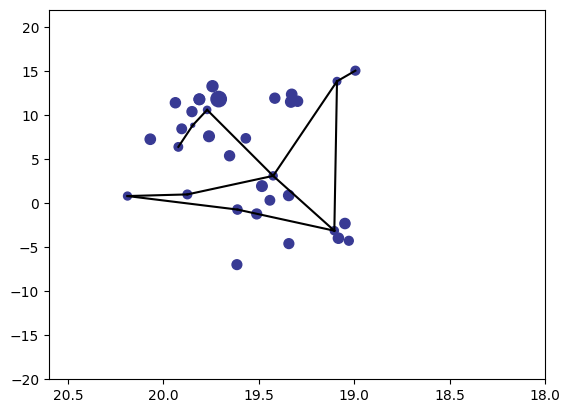

In [51]:
from matplotlib import pyplot as plt
import math

x = []
y = []
s = []

def ra_to_float(ra):
    items = [float(i[:-1]) for i in ra.split(' ')]
    hours = items[0]
    mins = items[1]
    secs = items[2]
    return hours + (mins / 60) + (secs / 3600)


def dec_to_float(d):
    s_deg = d.split('°\xa0')
    s_hour = s_deg[1].split('′\xa0')
    s_sec = s_hour[1].split('″')

    if ('−' in s_deg[0]):
        degs = -1 * float(s_deg[0][1:])
    else:
        degs = float(s_deg[0])
    
    mins = float(s_hour[0])
    secs = float(s_sec[0])
    return degs + (mins / 60) + (secs / 3600)

for ra in df['RA']:
  x.append(ra_to_float(ra))

for d in df['Dec']:
  y.append(dec_to_float(d))

bd_idx = 0
c = []
for vm in df['vis_mag']:
  if not pd.isnull(vm):
    if not pd.isnull(df['B'][bd_idx]):
      s.append(float(vm) * 10)
      c.append((56/ 255, 58/ 255, 148/ 255, 1))
    else:
      c.append((0, 0, 0, 0))
      s.append(float(vm) * 10)
  else:
    s.append(0)
    c.append((0, 0, 0, 0))
  bd_idx += 1


for i in range(df.shape[0]):
  #plt.text(x=x[i], y=y[i], s=df['Bayer Designation'][i], fontdict=dict(color='black',size=8))
  pass

#plt.xlim(20.6, 20)
plt.ylim(-20, 22)
plt.xlim(20.6, 18)
plt.scatter(x, y, s, c)


# draw lines for the actual constellation
lines = [
    (df.loc[df['Name'] == 'Altair'], df.loc[df['Name'] == 'γ Aql']),
    (df.loc[df['Name'] == 'Altair'], df.loc[df['Name'] == 'β Aql']),
    (df.loc[df['Name'] == 'γ Aql'], df.loc[df['Name'] == 'δ Aql']),
    (df.loc[df['Name'] == 'δ Aql'], df.loc[df['Name'] == 'ζ Aql']),
    (df.loc[df['Name'] == 'ζ Aql'], df.loc[df['Name'] == 'ε Aql']),
    (df.loc[df['Name'] == 'ζ Aql'], df.loc[df['Name'] == 'λ Aql']),
    (df.loc[df['Name'] == 'δ Aql'], df.loc[df['Name'] == 'λ Aql']),
    (df.loc[df['Name'] == 'λ Aql'], df.loc[df['Name'] == 'ι Aql']),
    (df.loc[df['Name'] == 'ι Aql'], df.loc[df['Name'] == 'θ Aql']),
    (df.loc[df['Name'] == 'θ Aql'], df.loc[df['Name'] == 'η Aql']),
    (df.loc[df['Name'] == 'η Aql'], df.loc[df['Name'] == 'δ Aql'])
]

for line in lines:
    p1x = ra_to_float(line[0]['RA'][line[0]['RA'].first_valid_index()])
    p1y = dec_to_float(line[0]['Dec'][line[0]['Dec'].first_valid_index()])
    p2x = ra_to_float(line[1]['RA'][line[1]['RA'].first_valid_index()])
    p2y = dec_to_float(line[1]['Dec'][line[1]['Dec'].first_valid_index()])
    plt.plot([p1x, p2x], [p1y, p2y], 'k-')
    pass

from IPython.display import Image
#Image('https://theskylive.com/sky/constellations/constellation_images/aquila.png')